In [1]:
# LINE PLOTS

In [2]:
%matplotlib inline

In [3]:
import pandas as pd
from pandas import Series, DataFrame
import matplotlib

matplotlib.rcParams["font.size"] = 16

In [4]:
# Line plots:
# Series.plot.line(...)       <--- one line
# DataFrame.plot.line(...)    <--- line per column

In [5]:
s = Series([0, 100, 300, 200, 400])
s

0      0
1    100
2    300
3    200
4    400
dtype: int64

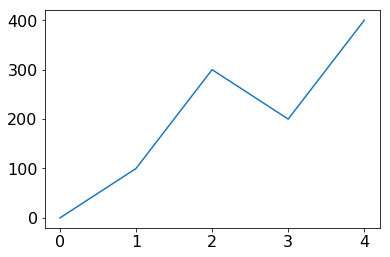

In [6]:
s.plot.line()

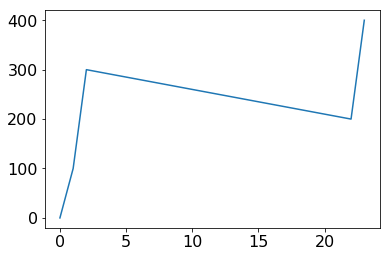

In [7]:
s = Series([0, 100, 300, 200, 400], index=[0, 1, 2, 22, 23])
s.plot.line()

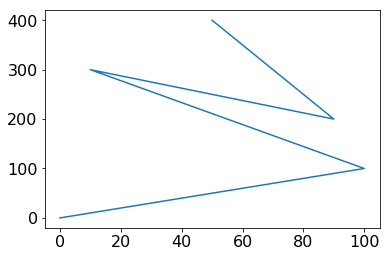

In [8]:
s = Series([0, 100, 300, 200, 400], index=[0, 100, 10, 90, 50])
s.plot.line()

In [9]:
s.sort_values()

0        0
100    100
90     200
10     300
50     400
dtype: int64

In [10]:
s.sort_index()

0        0
10     300
50     400
90     200
100    100
dtype: int64

In [11]:
# L.sort()    <-- modifies L, and returns None
# s.sort_index() or s.sort_values()  <-- creates new, doesn't modify

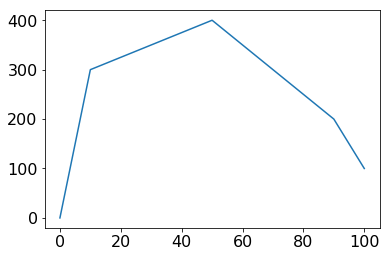

In [12]:
s.sort_index().plot.line()

In [13]:
# EXAMPLE 2: lines from DataFrame

In [14]:
df = DataFrame({
    "high": [26, 31, 43, 57, 68, 78, 82, 79, 72, 59, 44, 30],
    "low": [11, 15, 25, 36, 46, 56, 61, 59, 50, 39, 28, 16]
})
df

,high,low
0,26,11
1,31,15
2,43,25
3,57,36
4,68,46
5,78,56
6,82,61
7,79,59
8,72,50
9,59,39


Text(0, 0.5, 'Temp (Fehrenheit)')

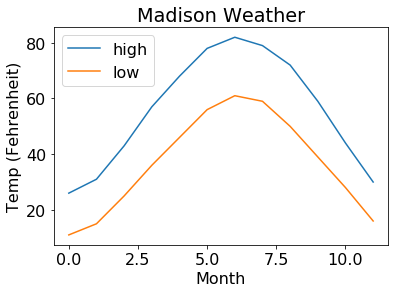

In [15]:
# LABELS: x, y, units
ax = df.plot.line(title="Madison Weather")
ax.set_xlabel("Month")
ax.set_ylabel("Temp (Fehrenheit)")

In [16]:
df = DataFrame({
    "month": ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"],
    "high": [26, 31, 43, 57, 68, 78, 82, 79, 72, 59, 44, 30],
    "low": [11, 15, 25, 36, 46, 56, 61, 59, 50, 39, 28, 16]
})
df = df.set_index("month")
df

,high,low
month,,
Jan,26,11
Feb,31,15
Mar,43,25
Apr,57,36
May,68,46
Jun,78,56
Jul,82,61
Aug,79,59
Sep,72,50


Text(0, 0.5, 'Temp (Fehrenheit)')

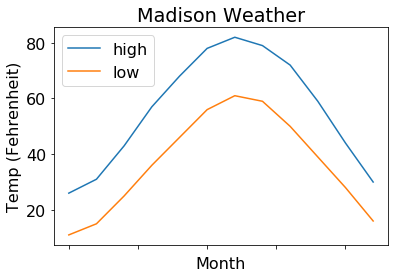

In [17]:
# LABELS: x, y, units
ax = df.plot.line(title="Madison Weather")
ax.set_xlabel("Month")
ax.set_ylabel("Temp (Fehrenheit)")

array([-2.5,  0. ,  2.5,  5. ,  7.5, 10. , 12.5])

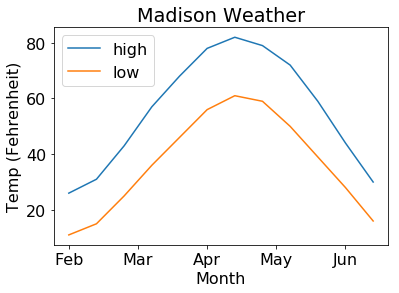

In [18]:
# LABELS: x, y, units
ax = df.plot.line(title="Madison Weather")
ax.set_xlabel("Month")
ax.set_ylabel("Temp (Fehrenheit)")
ax.set_xticklabels(df.index)
ax.get_xticks()

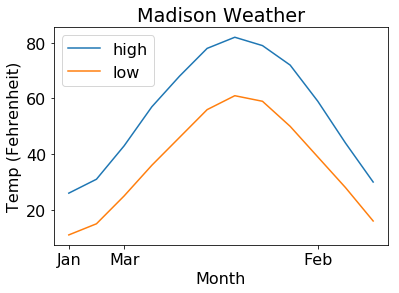

In [19]:
# LABELS: x, y, units
ax = df.plot.line(title="Madison Weather")
ax.set_xlabel("Month")
ax.set_ylabel("Temp (Fehrenheit)")
ax.set_xticklabels(["Jan", "Feb", "Mar"])
ax.set_xticks([0, 9, 2])
None

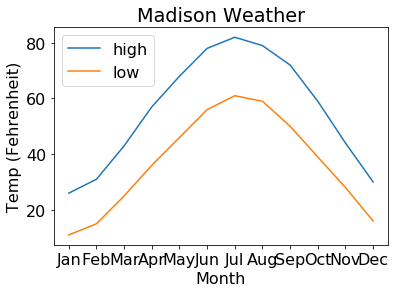

In [20]:
# LABELS: x, y, units
ax = df.plot.line(title="Madison Weather")
ax.set_xlabel("Month")
ax.set_ylabel("Temp (Fehrenheit)")
ax.set_xticklabels(df.index)
ax.set_xticks(range(12))
None
# 1. wider plot
# 2. fewer months
# 3. rotate the labels

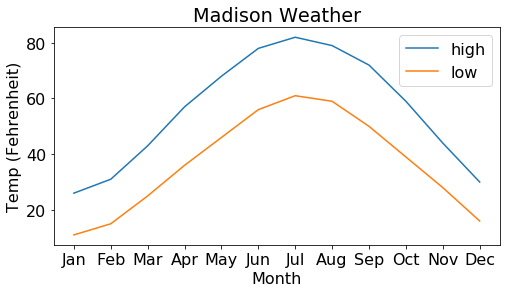

In [21]:
# approach 1
ax = df.plot.line(title="Madison Weather", figsize=(8,4))
ax.set_xlabel("Month")
ax.set_ylabel("Temp (Fehrenheit)")
ax.set_xticklabels(df.index)
ax.set_xticks(range(12))
None

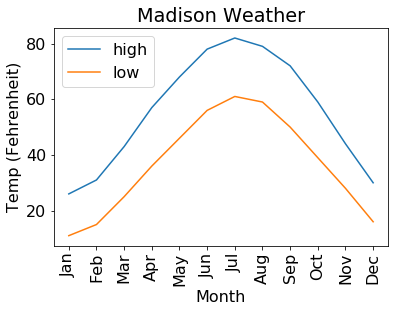

In [22]:
# approach 3
ax = df.plot.line(title="Madison Weather")
ax.set_xlabel("Month")
ax.set_ylabel("Temp (Fehrenheit)")
ax.set_xticklabels(df.index, rotation=90)
ax.set_xticks(range(12))
None
# 1. wider plot
# 2. fewer months
# 3. rotate the labels

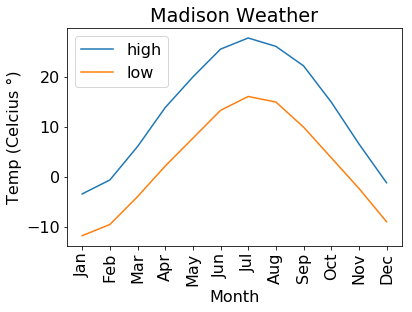

In [23]:
celcius = (df - 32) * (5/9)

ax = celcius.plot.line(title="Madison Weather")
ax.set_xlabel("Month")
ax.set_ylabel("Temp (Celcius °)")
ax.set_xticklabels(celcius.index, rotation=90)
ax.set_xticks(range(12))
None

In [24]:
# EXAMPLE S&P 500 returns
df = pd.read_csv("sp500.csv")
df["tot-ret"] = df["return"].cumprod()
df.tail()

,year,return,tot-ret
44,2014,1.1369,88.439335
45,2015,1.0138,89.659797
46,2016,1.1196,100.383109
47,2017,1.2183,122.296742
48,2018,0.9557,116.878996


In [25]:
df = df.set_index("year")
df.head()

,return,tot-ret
year,,
1970,1.0401,1.040100
1971,1.1431,1.188938
1972,1.1898,1.414599
1973,0.8534,1.207219
1974,0.7353,0.887668


Text(0, 0.5, 'Net Worth ($)')

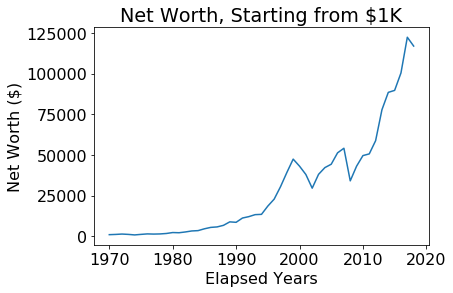

In [26]:
ax = (1000 * df["tot-ret"]).plot.line(title="Net Worth, Starting from $1K")
ax.set_xlabel("Elapsed Years")
ax.set_ylabel("Net Worth ($)")

In [27]:
import random
random.choices(["A", "B", "C"], k=5)

['C', 'B', 'B', 'B', 'A']

In [28]:
random.choices(list(df["return"]), k=5)

[1.0401, 1.2183, 1.2868, 1.0491, 1.0138]

In [29]:
def run_sim(start_money=1000, years=10):
    returns = random.choices(list(df["return"]), k=years)
    return start_money * Series(returns).cumprod()

run_sim()

0    1218.300000
1    1624.724880
2    1979.402321
3    2425.955485
4    3067.863306
5    2931.956962
6    3124.293339
7    3781.644657
8    3967.323410
9    4126.413078
dtype: float64

In [30]:
sim_count = 25
sims = DataFrame()
for i in range(sim_count):
    sims["sim"+str(i)] = run_sim(years=30)
    
sims.head(3) # 30 rows (because 30 years)

,sim0,sim1,sim2,sim3,sim4,sim5,sim6,sim7,sim8,sim9,...,sim15,sim16,sim17,sim18,sim19,sim20,sim21,sim22,sim23,sim24
0,1215.500000,1372.00000,1225.600000,1189.800000,1333.600000,928.200000,1316.900000,1238.400000,1062.700000,909.000000,...,1333.600000,1304.700000,779.000000,909.000000,1218.300000,881.100000,1157.900000,1304.700000,1065.600000,1285.800000
1,1070.977050,1008.83160,901.183680,1458.218880,1716.076480,976.930500,1593.975760,1303.416000,1291.711850,708.111000,...,1038.874400,1390.288320,817.248900,965.994300,1413.228000,837.749880,1214.752890,1386.504690,1390.288320,1168.792200
2,1224.233866,1336.70187,1193.077074,1876.436055,2103.223334,1131.187826,1937.477536,1445.227661,1701.055335,643.672899,...,1368.509247,1458.551477,914.991868,978.745425,1284.624252,849.310828,1666.640965,1685.296451,1831.426804,1308.579747


Text(0, 0.5, 'Net Worth ($)')

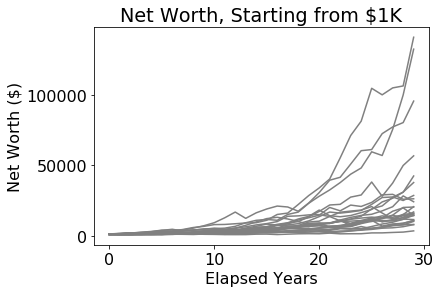

In [31]:
ax = sims.plot.line(title="Net Worth, Starting from $1K",
                    legend=False, color="gray")
ax.set_xlabel("Elapsed Years")
ax.set_ylabel("Net Worth ($)")

In [32]:
# don't want this
sims.describe() # stats about columns (stats per sim, over years)

,sim0,sim1,sim2,sim3,sim4,sim5,sim6,sim7,sim8,sim9,...,sim15,sim16,sim17,sim18,sim19,sim20,sim21,sim22,sim23,sim24
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,...,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,2932.903635,4874.623357,10329.793688,8156.587400,25320.335904,13703.428517,27180.254234,9248.360503,5309.189661,7124.196152,...,10302.665721,5463.305094,5941.468571,2920.406695,3917.129932,3769.987009,33611.575279,1548.166681,10748.266491,5225.479216
std,2546.859783,5232.972613,9516.308678,5116.073415,32246.876850,15756.455348,27657.290281,9464.902841,4039.850667,6616.812089,...,9924.150702,4325.365617,4111.838926,1713.946364,2211.855489,3334.673467,41297.228051,577.181915,9977.474470,3634.756090
min,849.011083,934.519342,901.183680,1189.800000,1333.600000,928.200000,1316.900000,1107.193163,1062.700000,643.672899,...,862.160826,1027.158738,779.000000,909.000000,1218.300000,837.749880,1157.900000,833.446960,1065.600000,1168.792200
25%,1234.234250,1359.348547,2139.764769,3534.258322,4033.782326,2272.777027,4465.570610,1503.828631,1827.522245,1507.358585,...,1614.369044,1671.578558,2234.698642,1782.694136,1805.834373,1770.037889,4839.678191,1193.564898,3907.298206,1830.322923
50%,2051.671601,2080.817471,8213.118163,8216.271699,11033.956268,5447.914257,17183.119373,4641.452663,3623.660789,3837.246601,...,5268.310970,4850.665185,5440.522578,2768.565204,4055.687755,2567.671898,10186.225407,1437.063726,6075.489084,4130.355925
75%,3305.647882,6405.325059,14113.042351,12165.932452,36523.687066,22256.754600,41080.557035,16703.579351,8300.443358,13319.877117,...,19558.532942,6794.196214,8932.573736,3426.311137,5079.538337,4689.323793,51636.585496,1720.155388,14378.056553,8861.234659
max,10855.864265,20689.277953,37871.578594,19868.780816,132636.643330,56834.109731,95744.251659,28681.010985,16127.966801,20793.335717,...,29483.251813,16958.592678,14390.424308,7963.698161,10256.159118,14555.611627,141122.722144,3513.057969,42507.544480,11009.490358


In [33]:
sims.head(3)

,sim0,sim1,sim2,sim3,sim4,sim5,sim6,sim7,sim8,sim9,...,sim15,sim16,sim17,sim18,sim19,sim20,sim21,sim22,sim23,sim24
0,1215.500000,1372.00000,1225.600000,1189.800000,1333.600000,928.200000,1316.900000,1238.400000,1062.700000,909.000000,...,1333.600000,1304.700000,779.000000,909.000000,1218.300000,881.100000,1157.900000,1304.700000,1065.600000,1285.800000
1,1070.977050,1008.83160,901.183680,1458.218880,1716.076480,976.930500,1593.975760,1303.416000,1291.711850,708.111000,...,1038.874400,1390.288320,817.248900,965.994300,1413.228000,837.749880,1214.752890,1386.504690,1390.288320,1168.792200
2,1224.233866,1336.70187,1193.077074,1876.436055,2103.223334,1131.187826,1937.477536,1445.227661,1701.055335,643.672899,...,1368.509247,1458.551477,914.991868,978.745425,1284.624252,849.310828,1666.640965,1685.296451,1831.426804,1308.579747


In [34]:
sims.T.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,...,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,1132.916000,1194.055168,1403.988395,1503.998687,1709.813514,1864.885837,1932.673967,2157.348613,2495.759102,2947.664904,...,11143.381471,12403.337613,13709.904298,15565.890689,17541.533134,20689.572915,21214.374720,23741.953507,26704.968551,31916.057500
std,181.891469,272.936275,406.213094,483.218024,628.714867,829.126240,932.860969,979.383430,1273.220915,1546.515888,...,8747.089454,10885.054497,13056.580305,16664.767314,18933.546578,23172.952264,23026.264185,25436.628200,28216.480255,37029.595537
min,779.000000,708.111000,641.305425,761.037147,792.937065,768.356016,1018.071722,1075.913011,947.986954,1085.825377,...,1439.215320,1919.337550,1411.288901,1480.583186,1501.015234,2065.096759,2093.595094,2393.188552,2653.567466,3513.057969
25%,969.000000,976.930500,1193.077074,1165.254456,1270.399710,1332.285640,1355.131396,1481.569188,1723.532344,2055.345899,...,5370.333711,5900.383164,6190.091978,6596.162011,8686.485753,10238.895476,8384.765132,9647.510761,11722.609973,11544.217622
50%,1189.800000,1214.752890,1368.509247,1418.223996,1665.602246,1719.231261,1661.839477,1846.452031,2172.438422,2514.326063,...,8477.206741,8894.396614,10298.821839,8900.040308,10817.998994,12398.810304,12702.629971,13155.452910,15037.998221,16127.966801
75%,1285.800000,1390.288320,1701.055335,1946.745726,1987.822061,2042.488799,2153.607534,2389.921256,2604.161037,3345.385209,...,14651.636288,14266.614746,16142.387729,16934.978967,18045.913587,20793.335717,24087.997646,27342.416683,28366.825261,28681.010985
max,1372.000000,1716.076480,2103.223334,2552.239159,3102.246697,3991.971050,4654.627013,4483.986001,5906.754759,7139.657542,...,34020.918118,40372.623531,55391.239484,71277.446968,81477.249629,104844.924823,100200.294654,105120.129121,106507.714825,141122.722144


In [35]:
sims.T.describe()[29]

count        25.000000
mean      31916.057500
std       37029.595537
min        3513.057969
25%       11544.217622
50%       16127.966801
75%       28681.010985
max      141122.722144
Name: 29, dtype: float64

In [36]:
# EXAMPLE: hydrant color

In [37]:
hydrants = pd.read_csv("Fire_Hydrants.csv")
hydrants.head()

,X,Y,OBJECTID,CreatedBy,CreatedDate,LastEditor,LastUpdate,FacilityID,DataSource,ProjectNumber,...,Elevation,Manufacturer,Style,year_manufactured,BarrelDiameter,SeatDiameter,Comments,nozzle_color,MaintainedBy,InstallType
0,-89.519573,43.049308,2536,NaN,NaN,WUJAG,2018-06-07T19:45:53.000Z,HYDR-2360-2,FASB,NaN,...,1138.0,NaN,Pacer,1996.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN
1,-89.521988,43.049193,2537,NaN,NaN,WUJAG,2018-06-07T19:45:53.000Z,HYDR-2360-4,FASB,NaN,...,1170.0,NaN,Pacer,1995.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN
2,-89.522093,43.048233,2538,NaN,NaN,WUJAG,2018-06-07T19:45:53.000Z,HYDR-2361-19,FASB,NaN,...,1179.0,NaN,Pacer,1996.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN
3,-89.521013,43.049033,2539,NaN,NaN,WUJAG,2018-06-07T19:45:53.000Z,HYDR-2360-3,FASB,NaN,...,1163.0,NaN,Pacer,1995.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN
4,-89.524782,43.056263,2540,NaN,NaN,WUPTB,2017-08-31T16:19:46.000Z,HYDR-2257-5,NaN,NaN,...,1065.0,NaN,Pacer,1996.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN


In [38]:
hydrants["nozzle_color"]

0        blue
1        blue
2        blue
3        blue
4        blue
5        blue
6        blue
7        blue
8        blue
9        blue
10       blue
11       blue
12       blue
13       blue
14       blue
15       blue
16       blue
17       blue
18       blue
19       blue
20       blue
21       blue
22       blue
23       blue
24       blue
25       blue
26       blue
27       blue
28       blue
29       blue
         ... 
10079     NaN
10080     NaN
10081     NaN
10082     NaN
10083     NaN
10084     NaN
10085     NaN
10086     NaN
10087     NaN
10088     NaN
10089     NaN
10090     NaN
10091     NaN
10092     NaN
10093     NaN
10094     NaN
10095     NaN
10096     NaN
10097     NaN
10098     NaN
10099     NaN
10100     NaN
10101     NaN
10102     NaN
10103     NaN
10104     NaN
10105     NaN
10106     NaN
10107     NaN
10108     NaN
Name: nozzle_color, Length: 10109, dtype: object

In [39]:
colors = hydrants["nozzle_color"].value_counts()
colors

blue      5810
Blue      1148
Green      320
Orange      74
BLUE        45
green        9
Red          9
orange       4
GREEN        1
C            1
ORANGE       1
white        1
Name: nozzle_color, dtype: int64

In [40]:
# Bars:
# 1. Series.plot.bar(...)   <--- one bar
# 2. DataFrame.plot.bar(...)  <--- mult bars (stacked or grouped)

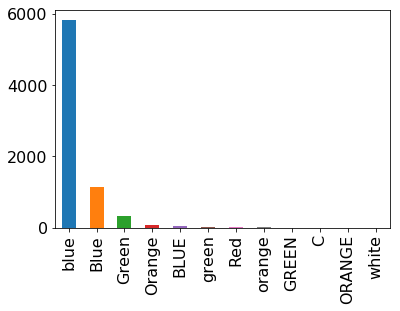

In [41]:
colors.plot.bar()

Text(0, 0.5, 'Number of Hydrants')

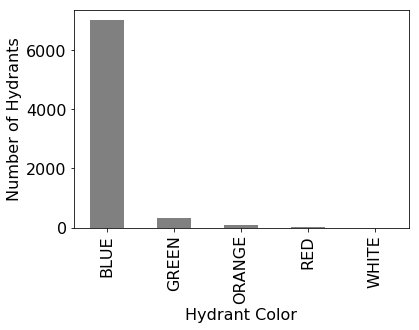

In [42]:
colors = hydrants["nozzle_color"].str.upper().value_counts()
colors = colors[colors.index.str.len() > 2] # get rid of things like "C"
ax = colors.plot.bar(color="gray")
ax.set_xlabel("Hydrant Color")
ax.set_ylabel("Number of Hydrants")

In [43]:
colors[colors.index.isin(["RED", "GREEN"])]

GREEN    330
RED        9
Name: nozzle_color, dtype: int64

In [44]:
hydrants.head()

,X,Y,OBJECTID,CreatedBy,CreatedDate,LastEditor,LastUpdate,FacilityID,DataSource,ProjectNumber,...,Elevation,Manufacturer,Style,year_manufactured,BarrelDiameter,SeatDiameter,Comments,nozzle_color,MaintainedBy,InstallType
0,-89.519573,43.049308,2536,NaN,NaN,WUJAG,2018-06-07T19:45:53.000Z,HYDR-2360-2,FASB,NaN,...,1138.0,NaN,Pacer,1996.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN
1,-89.521988,43.049193,2537,NaN,NaN,WUJAG,2018-06-07T19:45:53.000Z,HYDR-2360-4,FASB,NaN,...,1170.0,NaN,Pacer,1995.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN
2,-89.522093,43.048233,2538,NaN,NaN,WUJAG,2018-06-07T19:45:53.000Z,HYDR-2361-19,FASB,NaN,...,1179.0,NaN,Pacer,1996.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN
3,-89.521013,43.049033,2539,NaN,NaN,WUJAG,2018-06-07T19:45:53.000Z,HYDR-2360-3,FASB,NaN,...,1163.0,NaN,Pacer,1995.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN
4,-89.524782,43.056263,2540,NaN,NaN,WUPTB,2017-08-31T16:19:46.000Z,HYDR-2257-5,NaN,NaN,...,1065.0,NaN,Pacer,1996.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN


Text(0, 0.5, 'Number of Hydrants')

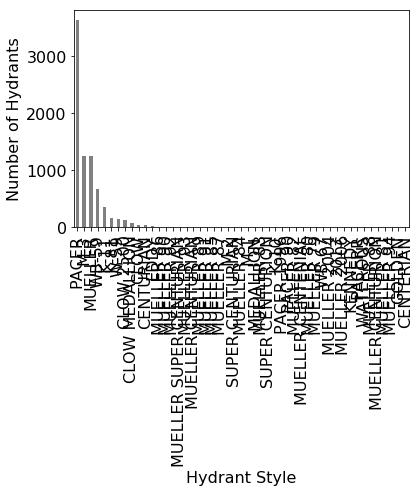

In [45]:
# TODO: fix the mueller hydrants (group them all together)
styles = hydrants["Style"].str.upper().value_counts()
styles = styles[styles.index.str.len() > 2] # get rid of things like "C"
ax = styles.plot.bar(color="gray")
ax.set_xlabel("Hydrant Style")
ax.set_ylabel("Number of Hydrants")

Text(0, 0.5, 'Number of Hydrants')

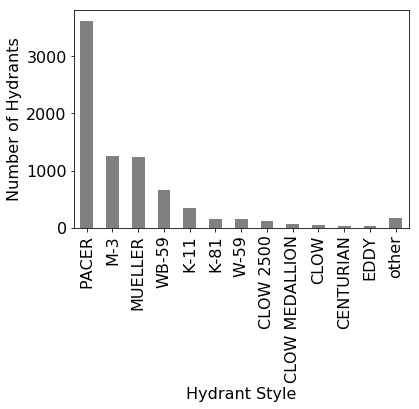

In [48]:
top12 = styles[:12]
top12["other"] = styles[12:].sum()
ax = top12.plot.bar(color="gray")
ax.set_xlabel("Hydrant Style")
ax.set_ylabel("Number of Hydrants")

In [57]:
hydrants["decade"] = hydrants["year_manufactured"] // 10 * 10
hydrants.head()

,X,Y,OBJECTID,CreatedBy,CreatedDate,LastEditor,LastUpdate,FacilityID,DataSource,ProjectNumber,...,Manufacturer,Style,year_manufactured,BarrelDiameter,SeatDiameter,Comments,nozzle_color,MaintainedBy,InstallType,decade
0,-89.519573,43.049308,2536,NaN,NaN,WUJAG,2018-06-07T19:45:53.000Z,HYDR-2360-2,FASB,NaN,...,NaN,Pacer,1996.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN,1990.0
1,-89.521988,43.049193,2537,NaN,NaN,WUJAG,2018-06-07T19:45:53.000Z,HYDR-2360-4,FASB,NaN,...,NaN,Pacer,1995.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN,1990.0
2,-89.522093,43.048233,2538,NaN,NaN,WUJAG,2018-06-07T19:45:53.000Z,HYDR-2361-19,FASB,NaN,...,NaN,Pacer,1996.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN,1990.0
3,-89.521013,43.049033,2539,NaN,NaN,WUJAG,2018-06-07T19:45:53.000Z,HYDR-2360-3,FASB,NaN,...,NaN,Pacer,1995.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN,1990.0
4,-89.524782,43.056263,2540,NaN,NaN,WUPTB,2017-08-31T16:19:46.000Z,HYDR-2257-5,NaN,NaN,...,NaN,Pacer,1996.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN,1990.0


In [69]:
# data will be clean after this
hydrants = hydrants[~hydrants["decade"].isna()].copy()

In [70]:
hydrants["decade"] = hydrants["decade"].astype(int)
hydrants.head()

,X,Y,OBJECTID,CreatedBy,CreatedDate,LastEditor,LastUpdate,FacilityID,DataSource,ProjectNumber,...,Manufacturer,Style,year_manufactured,BarrelDiameter,SeatDiameter,Comments,nozzle_color,MaintainedBy,InstallType,decade
0,-89.519573,43.049308,2536,NaN,NaN,WUJAG,2018-06-07T19:45:53.000Z,HYDR-2360-2,FASB,NaN,...,NaN,Pacer,1996.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN,1990
1,-89.521988,43.049193,2537,NaN,NaN,WUJAG,2018-06-07T19:45:53.000Z,HYDR-2360-4,FASB,NaN,...,NaN,Pacer,1995.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN,1990
2,-89.522093,43.048233,2538,NaN,NaN,WUJAG,2018-06-07T19:45:53.000Z,HYDR-2361-19,FASB,NaN,...,NaN,Pacer,1996.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN,1990
3,-89.521013,43.049033,2539,NaN,NaN,WUJAG,2018-06-07T19:45:53.000Z,HYDR-2360-3,FASB,NaN,...,NaN,Pacer,1995.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN,1990
4,-89.524782,43.056263,2540,NaN,NaN,WUPTB,2017-08-31T16:19:46.000Z,HYDR-2257-5,NaN,NaN,...,NaN,Pacer,1996.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN,1990


In [73]:
# hydrants[JUST PACERS]["decade"].value_counts()
pacers = hydrants[hydrants["Style"].str.upper() == "PACER"]["decade"].value_counts()
pacers

2000    1758
1990     849
2010     626
1980      21
1960       1
1950       1
Name: decade, dtype: int64

In [74]:
others = hydrants[hydrants["Style"].str.upper() != "PACER"]["decade"].value_counts()
others

2010    1073
1980     937
1970     578
1990     428
1950     370
1960     349
2000     187
1940      68
1930       9
1900       1
Name: decade, dtype: int64

In [78]:
df = DataFrame()
df["pacers"] = pacers
df["others"] = others
df = df.sort_index()
df

,pacers,others
1950,1,370
1960,1,349
1980,21,937
1990,849,428
2000,1758,187
2010,626,1073


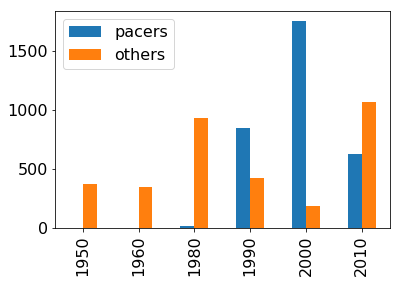

In [79]:
df.plot.bar()

Text(0, 0.5, '# of hydrants')

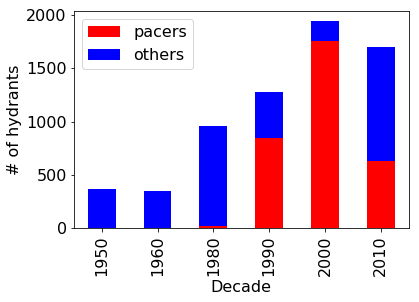

In [91]:
ax = df.plot.bar(stacked=True)
ax.set_xlabel("Decade")
ax.set_ylabel("# of hydrants")